# Handwritten Digit Recognization

## Importing the Required libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## loading the digits data

In [2]:
dig = load_digits()

## List of Atrributes and Methods of the Digits Data

In [3]:
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
dig.data[0]
# this is the digit 0 stored in the form of an array
# when we train the model, we send data but not images. so, we use this

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## digits and their image representation

0
1
2
3
4
5
6
7
8
9


<Figure size 640x480 with 0 Axes>

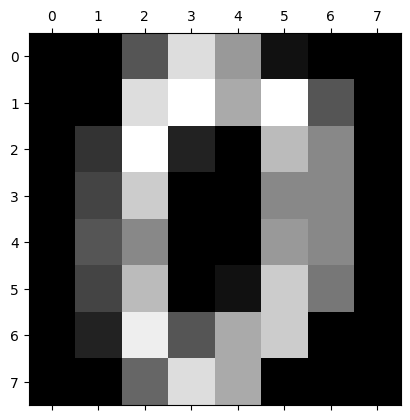

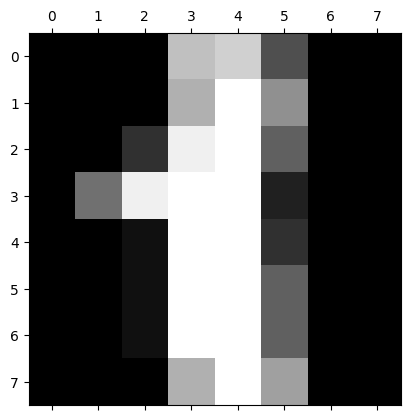

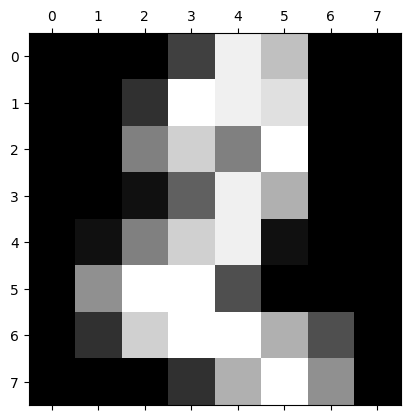

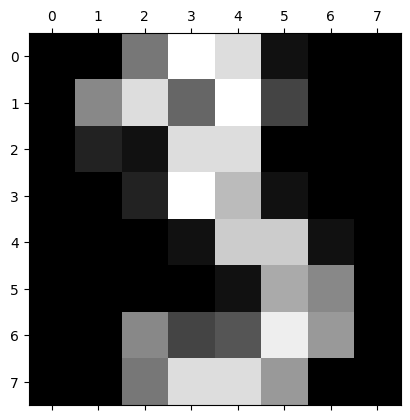

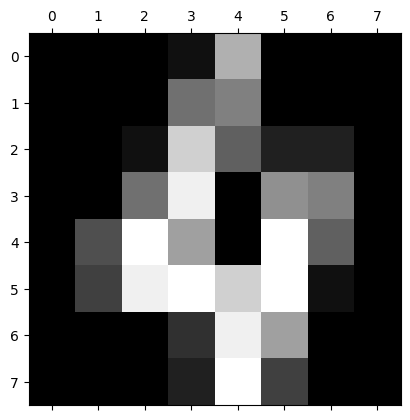

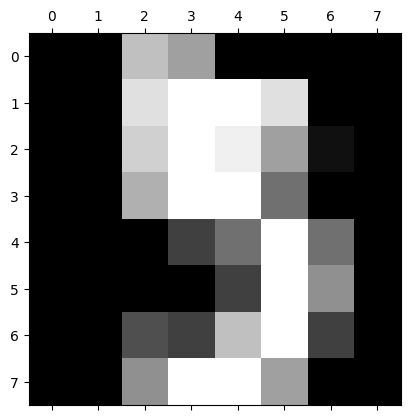

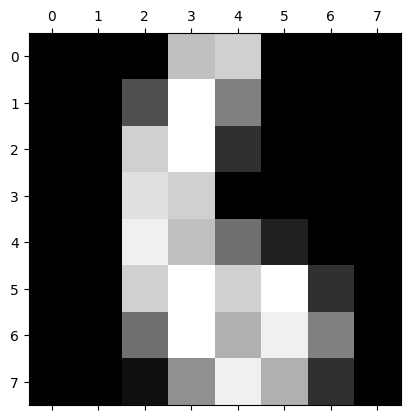

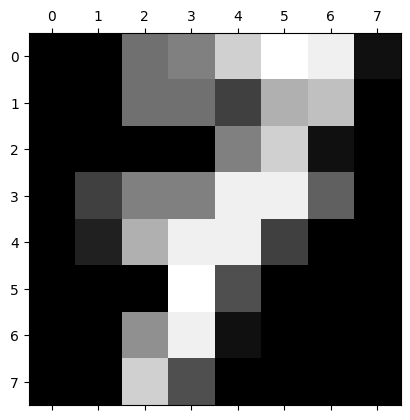

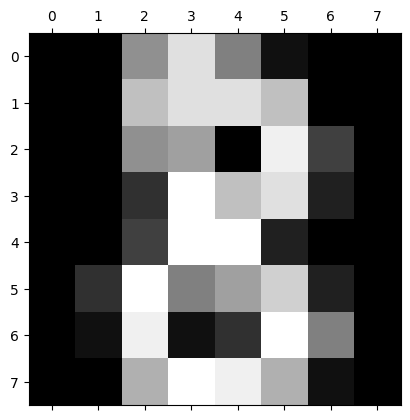

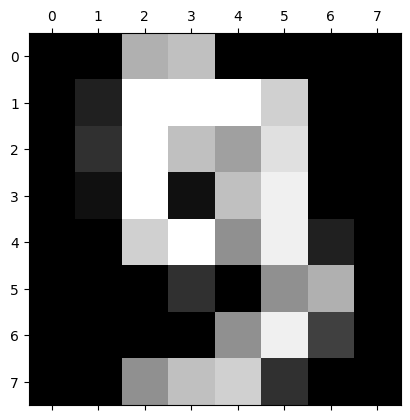

In [13]:
plt.gray()
for i in range(10):    
    plt.matshow(dig.images[i])

for i in range(10):  
    print(dig.target[i])

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dig.data,dig.target,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1,max_iter=1000)
clf.fit(X_train,y_train)

C:\Users\Katta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [20]:
clf.score(X_test,y_test)

0.9611111111111111

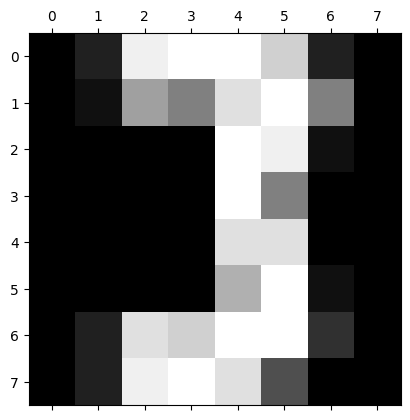

In [22]:
plt.matshow(dig.images[98])

In [24]:
dig.target[98]

3

## Lets check by doing a prediction

you can select some random number 

In [28]:
clf.predict([dig.data[47]])

array([1])

In [29]:
dig.target[47]

1

## Lets check the errors done by our model

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  2],
       [ 0,  0,  1,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 31]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

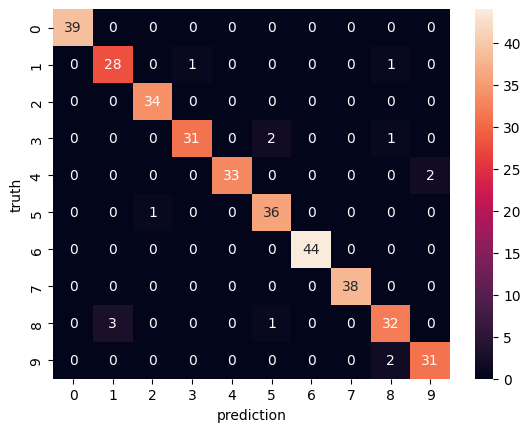

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')

at (0,0) 39 means, our model and truth predicted was 0 for 39 times <br>
at (1,8) our model predicted it to be 1, but the truth was 8. it happened 3 times.